In [7]:
import sys
import matplotlib.pyplot as plt 
from utils import parsePacket, process_Fail, processCommand, interact, interactBool
from packet import packet
from rtt import rtt
from ipPair import ipPair
from bw import bw
from interArrival import interArrival
from packetLen import packetLen
import pickle
import numpy
from scipy.stats import pearsonr

In [2]:
# args
inputFile = "../processedData/tr5output"
outputFile = "../tmpOutput"
N = 300
subnet = "192.168.1"
port = False
###################   Parse data   ###################
#  Record data from 1330 to 4500
(inputFile, faultLineNum, packets, baseTime) = parsePacket(inputFile, 1330, 4500)
#Print fail number

In [29]:
print(packets[1].len)
for packet in packets:
    if packet.len == 0:
        print(packet.line)
        break

53
20515  15:11:11.291123 2209286us tsft -57dBm signal -89dBm noise antenna 1 5785 MHz 11a ht/20 [|802.11]IP 17.248.223.6.443 > 192.168.1.13.50630: Flags [S.], seq 3525192208, ack 1351010100, win 28960, options [mss 1460,nop,nop,TS val 1169767192 ecr 345057905,nop,wscale 5], length 0



In [4]:
###################   Basic print packets Count   ###################
print("Total packets count:", len(packets))
count = 0
for i in packets:
    if i.getSender(True).find("130.211.14.80")==0 or i.getRecv(True).find("130.211.14.80")==0:
        count += 1
print("Poke count:", count)

Total packets count: 70328
Poke count: 27402


In [5]:
###################   Get IP pair information   ###################
thisIPpair = ipPair(packets, outputFile, subnet, port, N) 
logArr = thisIPpair.getLogArr()

###################   Get analysis IP pair(maximum 7)   ###################
(desiredArr, labels) = interact(logArr, N, fix=True)
print("Analysis Pair:", desiredArr, labels)
labels = ["Player1", "Player2", "Player3", "Player4", "Player5", "Player6"] 
print("Modified Analysis Pair:", desiredArr, labels)
colors = ['b', 'g', 'r', 'k', 'm', 'c', 'y']

0 192.168.1.11_17.134.127.249 520
1 192.168.1.11_130.211.14.80 3880
2 192.168.1.12_64.233.189.109 861
3 192.168.1.12_130.211.14.80 4938
4 192.168.1.14_130.211.14.80 4889
5 192.168.1.15_108.177.97.108 375
6 192.168.1.15_130.211.14.80 3174
7 192.168.1.18_31.13.87.1 322
8 192.168.1.18_34.249.158.101 1222
9 192.168.1.18_130.211.14.80 8770
10 192.168.1.18_172.217.24.10 945
11 192.168.1.18_172.217.24.16 2666
12 192.168.1.18_172.217.27.129 440
13 192.168.1.18_172.217.160.68 864
14 192.168.1.18_172.217.160.74 847
15 192.168.1.18_172.217.160.99 2515
16 192.168.1.18_172.217.160.106 931
17 192.168.1.18_175.96.16.14 719
18 192.168.1.18_175.96.19.33 1508
19 192.168.1.18_203.104.153.1 377
20 192.168.1.20_17.248.158.240 4083
21 192.168.1.20_104.66.139.232 505
22 192.168.1.20_130.211.14.80 1751
23 192.168.1.20_172.217.160.112 12657
Analysis Pair: [['192.168.1.18', '34.249.158.101'], ['192.168.1.18', '172.217.160.68'], ['192.168.1.11', '17.134.127.249'], ['192.168.1.12', '64.233.189.109'], ['192.168.1.

Process Packet Length
[['192.168.1.14', '130.211.14.80'], 70200]]
general all
[['192.168.1.14', '130.211.14.80'], 70200]]
Upload: 6536 Download: 6758
avg upload 249.9779681762546 avg download 527.7904705534181
Overall avg 391.20385136151646
895
Process Inter Arrival Time
20'192.168.1.18', '34.249.158.101'], 70200]
20'192.168.1.18', '172.217.160.68'], 70200]
20'192.168.1.11', '17.134.127.249'], 70200]
20'192.168.1.12', '64.233.189.109'], 70200]
20'192.168.1.12', '130.211.14.80'], 70200]
20'192.168.1.14', '130.211.14.80'], 70200]
max: 455.8444010000021
overall sumtime num 13282
Non filter: 0.5852220402800792
20 filter: 0.27566202954288177
50 filter: 0.3347714753430868
75 filter: 0.363307707513755
100 filter: 0.37808655790822226
150 filter: 0.3988202955624211
200 filter: 0.3988202955624211
400 filter: 0.5166656990210852
600 filter: 0.5852220402800792

Process Bandwidth
['192.168.1.18', '34.249.158.101']], 70200]
Last period: 323 250 573
Upload sum: 929.4677734375 KB Download sum: 23.60449

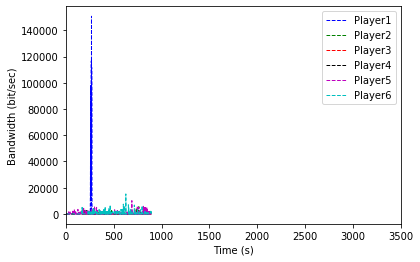

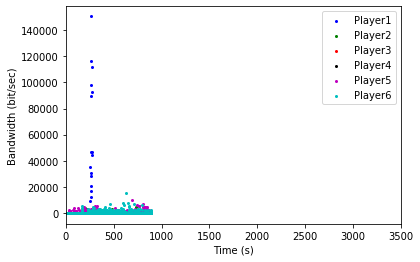

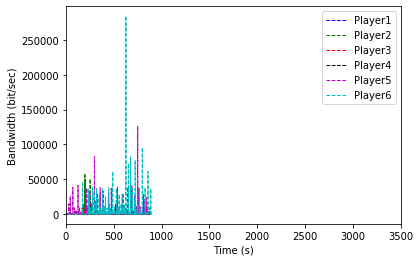

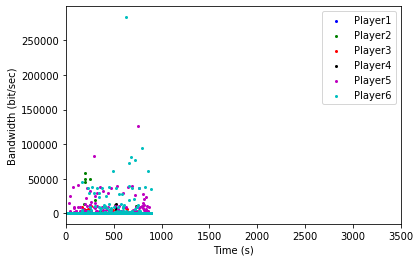

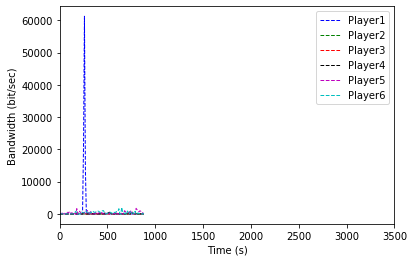

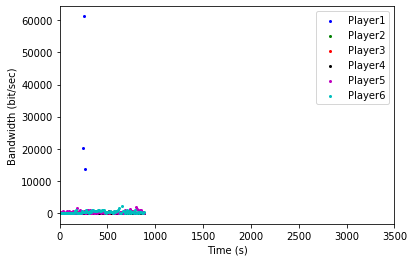

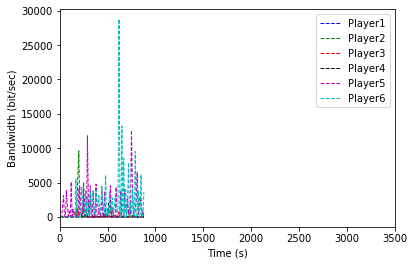

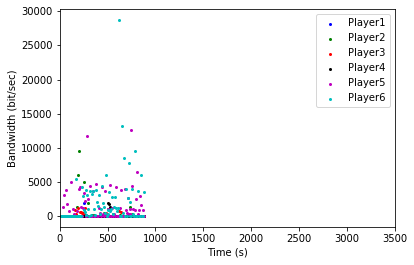

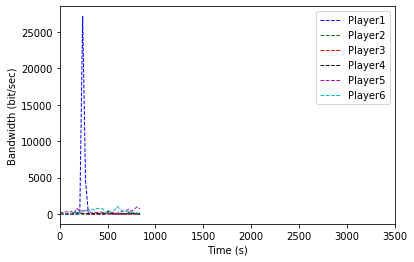

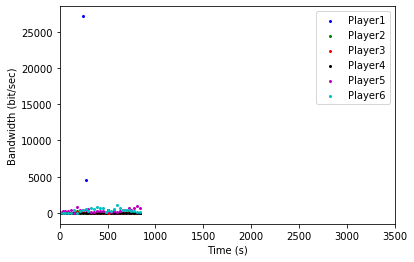

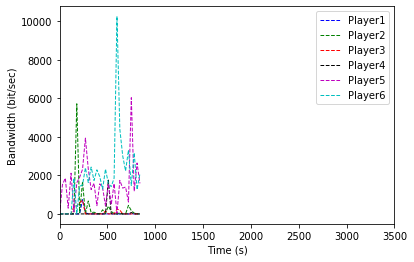

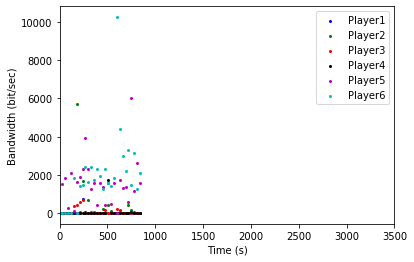

In [15]:
###################   Different class initialization: Uncomment if you need it   ###################
# objRTT = rtt(packets, baseTime, desiredArr, outputFile, colors, labels)
objPacketLen = packetLen(packets, desiredArr, outputFile, colors, labels, baseTime, True)
objInterArrival = interArrival(packets, desiredArr, outputFile, colors, labels, baseTime)
objBW = bw(packets, baseTime, desiredArr, outputFile, colors, labels)

###################   Plot Overall BW   ###################
objBW.plotTimeSeries(0, 3500, 1)
objBW.plotTimeSeries(0, 3500, 10)
objBW.plotTimeSeries(0, 3500, 30)


['192.168.1.11', '130.211.14.80']], 70200]
Last period: 700 185 885
Upload sum: 197.431640625 KB Download sum: 1689.18359375 KB
Avg upload BW: 0.2820452008928571 Avg download: 2.413119419642857

['192.168.1.12', '130.211.14.80']], 70200]
Last period: 884 10 894
Upload sum: 295.328125 KB Download sum: 1321.12890625 KB
Avg upload BW: 0.33408158936651583 Avg download: 1.4944897129524888

['192.168.1.14', '130.211.14.80']], 70200]
Last period: 726 169 895
Upload sum: 295.96484375 KB Download sum: 1701.841796875 KB
Avg upload BW: 0.40766507403581265 Avg download: 2.344134706439394

['192.168.1.15', '130.211.14.80']], 70200]
Last period: 875 11 886
Upload sum: 367.1552734375 KB Download sum: 455.931640625 KB
Avg upload BW: 0.4196060267857143 Avg download: 0.5210647321428571

['192.168.1.20', '130.211.14.80']], 70200]
Last period: 103 792 895
Upload sum: 122.56640625 KB Download sum: 954.3896484375 KB
Avg upload BW: 1.189965109223301 Avg download: 9.265918916868932

['192.168.1.18', '130.211.

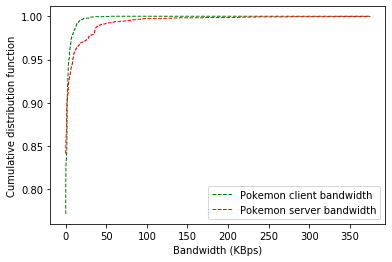

In [14]:
###################   Process Pokemon Go Traffic  ################### 
pokemonData = [[["192.168.1.11", "130.211.14.80"], 0, 100000], [["192.168.1.12", "130.211.14.80"], 0, 100000], [["192.168.1.14", "130.211.14.80"], 0, 100000], [["192.168.1.15", "130.211.14.80"], 0, 100000], [["192.168.1.20", "130.211.14.80"], 0, 10000], [["192.168.1.18", "130.211.14.80"], 0, 10000]]
#####   Plot Poke BW   #####
(pokeUploadBW, pokeDownloadBW) = objBW.processSpecificPairs(pokemonData)
plt.plot([i/1024 for i in range(len(pokeUploadBW))], [k/pokeUploadBW[-1] for k in pokeUploadBW],  color='green', linestyle='dashed', linewidth = 1, label = "Pokemon client bandwidth")
plt.plot([i/1024 for i in range(len(pokeDownloadBW))], [k/pokeDownloadBW[-1] for k in pokeDownloadBW],  color='red', linestyle='dashed', linewidth = 1, label = "Pokemon server bandwidth")
plt.xlabel('Bandwidth (KBps)')
plt.ylabel('Cumulative distribution function')
#plt.xscale('log')
plt.legend(loc="lower right")
plt.show()

max: 72.87346599999728.211.14.80'], 70200]


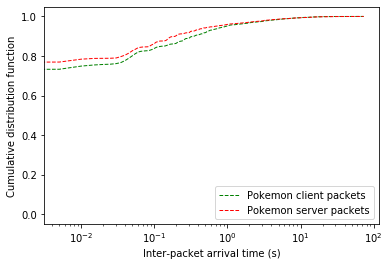

In [16]:
#####   Plot Poke interarrival   #####
pokeUploadInterArr, pokeUploadPacketNum, pokeDownloadInterArr, pokeDownloadPacketNum = objInterArrival.processSpecificPairs(pokemonData)
plt.plot([j[0] for j in pokeUploadInterArr], [k[1]/pokeUploadPacketNum for k in pokeUploadInterArr],  color='green', linestyle='dashed', linewidth = 1, label = "Pokemon client packets")
plt.plot([j[0] for j in pokeDownloadInterArr], [k[1]/pokeDownloadPacketNum for k in pokeDownloadInterArr],  color='red', linestyle='dashed', linewidth = 1, label = "Pokemon server packets")
#Plot inactive interarrival
plt.xlabel('Inter-packet arrival time (s)')
plt.ylabel('Cumulative distribution function')
plt.xscale('log')
plt.legend(loc="lower right")
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[['192.168.1.18', '130.211.14.80'], 70200]
process specific pair average 445.3446463761769


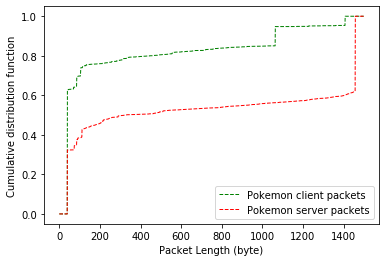

In [42]:
#####   Plot Poke packetLen   #####
# 40 0s
zeros = [0]*40
print(zeros)
(pokeUploadPacketLen, pokeDownloadPacketLen) = objPacketLen.processSpecificPairs(pokemonData)
pokeUploadPacketLen = zeros + pokeUploadPacketLen
pokeDownloadPacketLen = zeros + pokeDownloadPacketLen


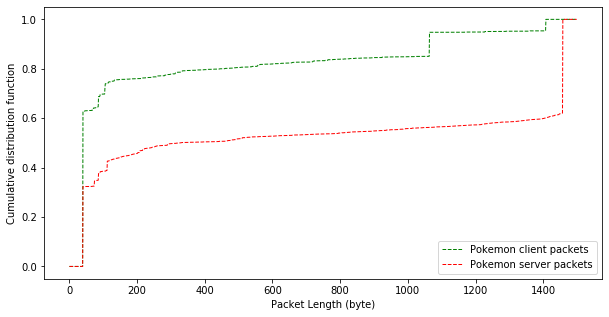

In [50]:
plt.figure(figsize=(10, 5))
plt.plot(range(len(pokeUploadPacketLen)), [k/pokeUploadPacketLen[-1] for k in pokeUploadPacketLen],  color='green', linestyle='dashed', linewidth = 1, label = "Pokemon client packets")
plt.plot(range(len(pokeDownloadPacketLen)), [k/pokeDownloadPacketLen[-1] for k in pokeDownloadPacketLen],  color='red', linestyle='dashed', linewidth = 1, label = "Pokemon server packets")
plt.xlabel('Packet Length (byte)')
plt.ylabel('Cumulative distribution function')
plt.legend(loc="lower right")
# plt.show()
plt.savefig("packetlen.png")

In [36]:
tmp = []
for x in range(1, len(pokeUploadPacketLen)):
    tmp.append((x, pokeUploadPacketLen[x]-pokeUploadPacketLen[x-1]))
for x in tmp:
    print(x[0], x[1])

1 1
2 1
3 0
4 0
5 0
6 17
7 0
8 0
9 5
10 1
11 0
12 4
13 0
14 0
15 0
16 0
17 0
18 8
19 0
20 1
21 0
22 0
23 0
24 0
25 0
26 16
27 0
28 0
29 0
30 0
31 119
32 0
33 0
34 8
35 0
36 0
37 9
38 7
39 0
40 0
41 0
42 37
43 0
44 0
45 10
46 565
47 0
48 0
49 0
50 36
51 83
52 8
53 8
54 0
55 0
56 0
57 0
58 7
59 0
60 0
61 0
62 0
63 0
64 0
65 372
66 203
67 0
68 0
69 0
70 0
71 0
72 0
73 0
74 30
75 53
76 5
77 16
78 0
79 0
80 0
81 0
82 33
83 0
84 0
85 1
86 0
87 0
88 0
89 1
90 10
91 0
92 1
93 57
94 0
95 0
96 0
97 2
98 10
99 0
100 2
101 0
102 0
103 0
104 0
105 0
106 8
107 0
108 0
109 0
110 0
111 0
112 0
113 0
114 11
115 0
116 0
117 0
118 3
119 0
120 0
121 0
122 0
123 0
124 2
125 0
126 0
127 0
128 0
129 0
130 7
131 0
132 2
133 0
134 0
135 0
136 0
137 0
138 7
139 0
140 0
141 0
142 0
143 0
144 0
145 0
146 9
147 0
148 3
149 0
150 0
151 0
152 0
153 0
154 3
155 0
156 3
157 0
158 0
159 2
160 0
161 0
162 2
163 0
164 0
165 0
166 0
167 0
168 0
169 0
170 2
171 0
172 2
173 28
174 2
175 0
176 0
177 1
178 1
179 0
180 5
181 0

1401 0
1402 0
1403 0
1404 0
1405 0
1406 0
1407 0
1408 0
1409 0
1410 0
1411 0
1412 0
1413 0
1414 0
1415 0
1416 0
1417 0
1418 0
1419 0
1420 0
1421 0
1422 0
1423 0
1424 0
1425 0
1426 0
1427 0
1428 0
1429 0
1430 0
1431 0
1432 0
1433 0
1434 0
1435 0
1436 0
1437 0
1438 0
1439 0
1440 0
1441 0
1442 0
1443 0
1444 0
1445 0
1446 0
1447 0
1448 0
1449 0
1450 0
1451 0
1452 0
1453 0
1454 0
1455 0
1456 0
1457 0
1458 0
1459 0


In [22]:
print(pokemonData)

[[['192.168.1.11', '130.211.14.80'], 0, 100000], [['192.168.1.12', '130.211.14.80'], 0, 100000], [['192.168.1.14', '130.211.14.80'], 0, 100000], [['192.168.1.15', '130.211.14.80'], 0, 100000], [['192.168.1.20', '130.211.14.80'], 0, 10000], [['192.168.1.18', '130.211.14.80'], 0, 10000]]
